In [1]:
import os

In [2]:
%pwd

'd:\\Machine_Learning\\self_projects\\end_to_end_projects_with_deployment\\ML_projects\\bank_customer_churn\\Machine-Learning-project-with-MLflow-deployment\\research'

In [3]:
os.chdir("../")
%pwd

'd:\\Machine_Learning\\self_projects\\end_to_end_projects_with_deployment\\ML_projects\\bank_customer_churn\\Machine-Learning-project-with-MLflow-deployment'

### Data set review & preparation

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("artifacts/data_ingestion/Churn_Modelling.csv")

In [6]:
df.shape

(10002, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(9998, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [13]:
df.nunique()

RowNumber          9996
CustomerId         9996
Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  73
Tenure               11
Balance            6379
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9995
Exited                2
dtype: int64

In [14]:
df['CustomerId'].duplicated().any()

True

In [15]:
ids = df["CustomerId"]
df[ids.isin(ids[ids.duplicated()])].sort_values("CustomerId")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


### EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

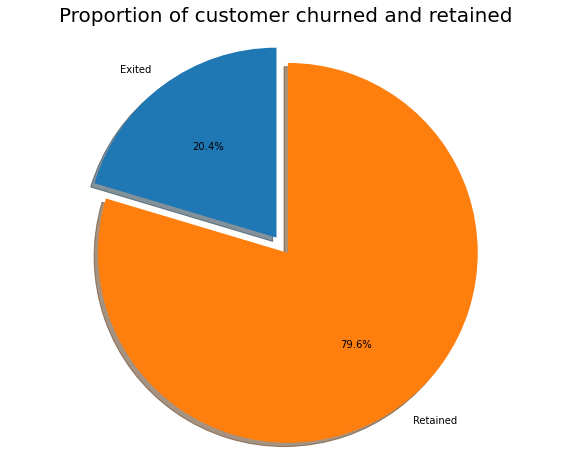

In [19]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

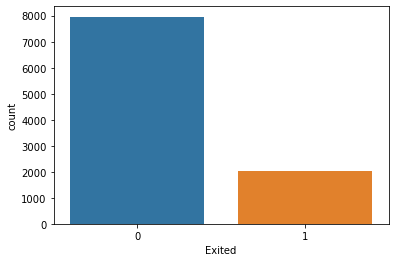

In [20]:
sns.countplot(x ='Exited', data = df)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

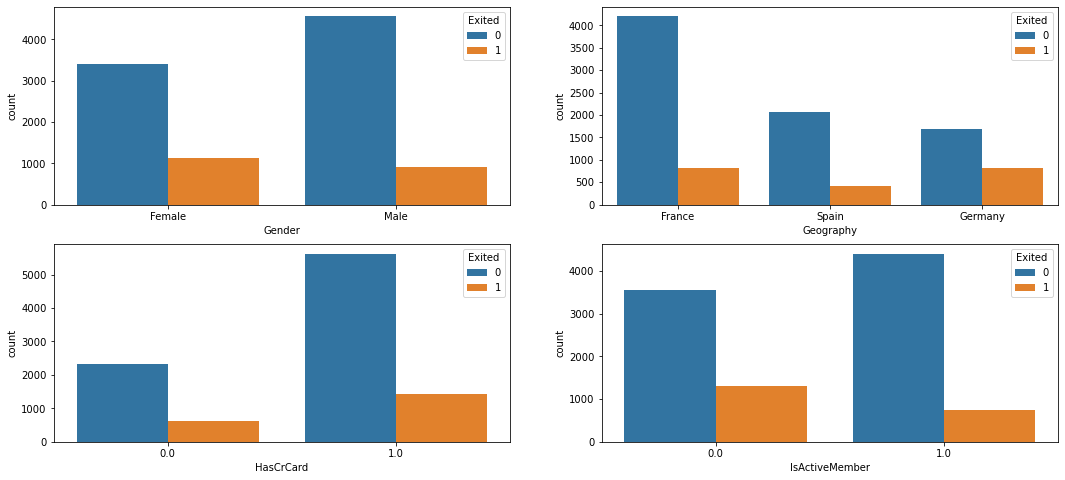

In [21]:
fig, axar = plt.subplots(2, 2, figsize=(18, 8))
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axar[0][0])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axar[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axar[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axar[1][1])

### Feature Engineering & Preprocessing

In [22]:
#df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [24]:
df_encoded = pd.get_dummies(df, columns = ['Gender', 'Geography'], drop_first = True)

In [25]:
df_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,0
1,2,15647311,Hill,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,3,15619304,Onio,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0,0
5,6,15574012,Chu,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,1,0,1


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          9996 non-null   int64  
 1   CustomerId         9996 non-null   int64  
 2   Surname            9996 non-null   object 
 3   CreditScore        9996 non-null   int64  
 4   Age                9996 non-null   float64
 5   Tenure             9996 non-null   int64  
 6   Balance            9996 non-null   float64
 7   NumOfProducts      9996 non-null   int64  
 8   HasCrCard          9996 non-null   float64
 9   IsActiveMember     9996 non-null   float64
 10  EstimatedSalary    9996 non-null   float64
 11  Exited             9996 non-null   int64  
 12  Gender_Male        9996 non-null   uint8  
 13  Geography_Germany  9996 non-null   uint8  
 14  Geography_Spain    9996 non-null   uint8  
dtypes: float64(5), int64(6), object(1), uint8(3)
memory usage: 1.3+ MB


In [27]:
import numpy as np
df_encoded['HasCrCard'] = df_encoded['HasCrCard'].astype(np.uint8)
df_encoded['IsActiveMember'] = df_encoded['IsActiveMember'].astype(np.uint8)

In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          9996 non-null   int64  
 1   CustomerId         9996 non-null   int64  
 2   Surname            9996 non-null   object 
 3   CreditScore        9996 non-null   int64  
 4   Age                9996 non-null   float64
 5   Tenure             9996 non-null   int64  
 6   Balance            9996 non-null   float64
 7   NumOfProducts      9996 non-null   int64  
 8   HasCrCard          9996 non-null   uint8  
 9   IsActiveMember     9996 non-null   uint8  
 10  EstimatedSalary    9996 non-null   float64
 11  Exited             9996 non-null   int64  
 12  Gender_Male        9996 non-null   uint8  
 13  Geography_Germany  9996 non-null   uint8  
 14  Geography_Spain    9996 non-null   uint8  
dtypes: float64(3), int64(6), object(1), uint8(5)
memory usage: 1.1+ MB


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
df_encoded['normalizedCreditScore'] = StandardScaler().fit_transform(df_encoded.CreditScore.values.reshape(-1,1))
df_encoded['normalizedAge'] = StandardScaler().fit_transform(df_encoded.Age.values.reshape(-1,1))
df_encoded['normalizedTenure'] = StandardScaler().fit_transform(df_encoded.Tenure.values.reshape(-1,1))
df_encoded['normalizedBalance'] = StandardScaler().fit_transform(df_encoded.Balance.values.reshape(-1,1))
df_encoded['normalizedEstimatedSalary'] = StandardScaler().fit_transform(df_encoded.EstimatedSalary.values.reshape(-1,1))
df_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,normalizedCreditScore,normalizedAge,normalizedTenure,normalizedBalance,normalizedEstimatedSalary
0,1,15634602,Hargrave,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0,-0.326054,0.293570,-1.041870,-1.225699,0.021599
1,2,15647311,Hill,608,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,-0.439902,0.198222,-1.387627,0.117505,0.216237
2,3,15619304,Onio,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0,-1.536986,0.293570,1.032669,1.333214,0.240389
3,4,15701354,Boni,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,0,0.501933,0.007526,-1.387627,-1.225699,-0.109199
5,6,15574012,Chu,645,44.0,8,113755.78,2,1,0,149756.71,1,1,0,1,-0.056958,0.484266,1.032669,0.597486,0.863322


In [31]:
df_s = df_encoded.drop(["RowNumber", "CustomerId", "Surname", "CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"], axis = 1)
df_s.head()

,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_Male,Geography_Germany,Geography_Spain,normalizedCreditScore,normalizedAge,normalizedTenure,normalizedBalance,normalizedEstimatedSalary
0,1,1,1,1,0,0,0,-0.326054,0.293570,-1.041870,-1.225699,0.021599
1,1,0,1,0,0,0,1,-0.439902,0.198222,-1.387627,0.117505,0.216237
2,3,1,0,1,0,0,0,-1.536986,0.293570,1.032669,1.333214,0.240389
3,2,0,0,0,0,0,0,0.501933,0.007526,-1.387627,-1.225699,-0.109199
5,2,1,0,1,1,0,1,-0.056958,0.484266,1.032669,0.597486,0.863322


In [32]:
X = df_s.drop(['Exited'], axis='columns')
y = df_s.Exited

#### Upsampling

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

c:\ProgramData\Anaconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

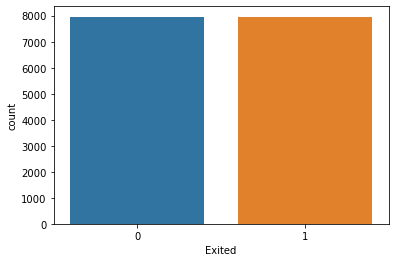

In [35]:
sns.countplot(y_resample)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=12)

In [38]:
print(X_train.shape)
X_test.shape

(12734, 11)


(3184, 11)

In [39]:
df_final = pd.concat([X_resample, y_resample], axis=1)
df_final.shape

(15918, 12)

In [40]:
df_final.head()

,NumOfProducts,HasCrCard,IsActiveMember,Gender_Male,Geography_Germany,Geography_Spain,normalizedCreditScore,normalizedAge,normalizedTenure,normalizedBalance,normalizedEstimatedSalary,Exited
0,1,1,1,0,0,0,-0.326054,0.293570,-1.041870,-1.225699,0.021599,1
1,1,0,1,0,0,1,-0.439902,0.198222,-1.387627,0.117505,0.216237,0
2,3,1,0,0,0,0,-1.536986,0.293570,1.032669,1.333214,0.240389,1
3,2,0,0,0,0,0,0.501933,0.007526,-1.387627,-1.225699,-0.109199,0
4,2,1,0,1,0,1,-0.056958,0.484266,1.032669,0.597486,0.863322,1


In [41]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path

In [42]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [43]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation

        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir=config.root_dir,
            data_path=config.data_path,
        )

        return data_transformation_config

In [44]:
import os
from mlProject import logger
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [45]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config


    def fe_and_pre_process(self):
        data = pd.read_csv(self.config.data_path)

        df = data.dropna()
        df.drop_duplicates(inplace=True)

        df_encoded = pd.get_dummies(df, columns = ['Gender', 'Geography'], drop_first = True)

        df_encoded['HasCrCard'] = df_encoded['HasCrCard'].astype(np.uint8)
        df_encoded['IsActiveMember'] = df_encoded['IsActiveMember'].astype(np.uint8)
        
        df_encoded['normalizedCreditScore'] = StandardScaler().fit_transform(df_encoded.CreditScore.values.reshape(-1,1))
        df_encoded['normalizedAge'] = StandardScaler().fit_transform(df_encoded.Age.values.reshape(-1,1))
        df_encoded['normalizedTenure'] = StandardScaler().fit_transform(df_encoded.Tenure.values.reshape(-1,1))
        df_encoded['normalizedBalance'] = StandardScaler().fit_transform(df_encoded.Balance.values.reshape(-1,1))
        df_encoded['normalizedEstimatedSalary'] = StandardScaler().fit_transform(df_encoded.EstimatedSalary.values.reshape(-1,1))

        df_scaled = df_encoded.drop(["RowNumber", "CustomerId", "Surname", "CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"], axis = 1)
        
        X = df_scaled.drop(['Exited'], axis='columns')
        y = df_scaled.Exited

        X_resample, y_resample = SMOTE().fit_resample(X, y)

        data = pd.concat([X_resample, y_resample], axis=1)

        # Split the data into training and test sets. (0.80, 0.20) split.
        train, test = train_test_split(data, test_size=0.20, random_state=12)

        train.to_csv(os.path.join(self.config.root_dir, "train.csv"),index = False)
        test.to_csv(os.path.join(self.config.root_dir, "test.csv"),index = False)

        logger.info("Feature Engineering and Pre-processing is done!")
        logger.info(train.shape)
        logger.info(test.shape)

        print(train.shape)
        print(test.shape)
        

In [46]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.fe_and_pre_process()
except Exception as e:
    raise e

[2024-06-27 20:47:48,509: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-06-27 20:47:48,511: INFO: common: yaml file: params.yaml loaded successfully]
[2024-06-27 20:47:48,515: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-06-27 20:47:48,516: INFO: common: created directory at: artifacts]
[2024-06-27 20:47:48,517: INFO: common: created directory at: artifacts/data_transformation]


c:\ProgramData\Anaconda3\envs\mlops\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


[2024-06-27 20:47:48,806: INFO: 2914486385: Feature Engineering and Pre-processing is done!]
[2024-06-27 20:47:48,806: INFO: 2914486385: (12734, 12)]
[2024-06-27 20:47:48,806: INFO: 2914486385: (3184, 12)]
(12734, 12)
(3184, 12)
